In [1]:
#PHYS 213
#Assignment 4
#Anne Xie
#Student Number: 20125978

In [4]:
#Question 1

"""
1)Write in cruve as a function
2)Guess two values close to the root (these will be the x values)
2.5) CAUTION: Make sure the guesses allow the secant to cross the x-axis (avoid zero denominator)
3)Find the function values with the two guesses
4)Connect these points with a line that also runs through the x-axis
5)Compare the difference between the new x (where it hits the x-axis) and old x values on the function. 
6)Use new x and the x with the larger difference
7)Repeat until values converge
"""

'\n1)Write in function\n2)Guess two values close to the root (these will be the x values)\n2.5) CAUTION: Make sure the guesses allow the secant to cross the x-axis (avoid zero denominator)\n3)Find the function values with the two guess\n4)Connect these points with a line that also runs through the x-axis\n5)Compare the difference betweent the new x and old x values. \n6)Use new x and the x with the larger difference\n7)Repeat until....?\n\n'

The root is 54.97787143782138 with a value of 0
It took 9 steps to find the root


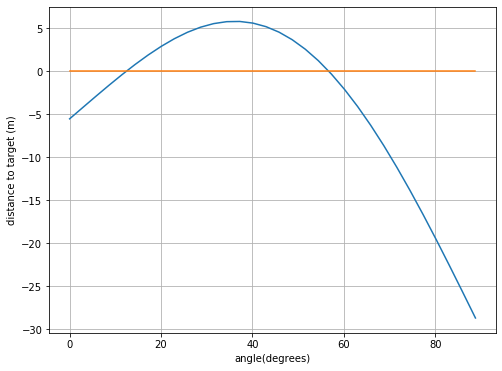

In [22]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Define the cruve with a function
def equation(x,*p):
    return p[1]*np.cos(x)/p[2]*(p[1]*np.sin(x) + np.sqrt(p[1]**2*np.sin(x)**2 + 2*p[0]*p[1]))

#Define x and y values
angles = np.arange(0,np.pi/2, 0.05)
distance = equation(angles, 7, 16, 9.8)
distance2 = distance - np.ones(len(distance))*30
zeroLine = np.zeros(len(angles)) #zero line

#plot the data
plt.rcParams['figure.figsize'] = 8,6
plt.grid(True) 
plt.plot(np.rad2deg(angles), distance2)
plt.plot(np.rad2deg(angles), zeroLine)
plt.xlabel('angle(degrees)')
plt.ylabel('distance to target (m)')

#Define function to use the secant method
def secant(x0,x1,n):
    #Set initial function values using guesses
    y0 = equation(x0,7,16,9.8)
    y1 = equation(x1,7,16,9.8)
    trials = []
    for i in range(n): # Use for loop to iterate 
        if equation(x1,7, 16, 9.8) - equation(x0,7, 16, 9.8) == 0:
            trials.append(x1)
            return trials
        else:
            x2 = (x0*y1 - x1*y0)/(y1 -y0) #Find the secant and the new x point
            x0,x1 = x1, x2 #change the x vaiables
            y0, y1 = y1, equation(x2,7,16,9.8) #change function values
        trials.append(x1)
    return trials

root = secant(55, 65, 100)
print ("The root is", root[-1],"with a value of 0")
print ("It took",len(root),"steps to find the root")

#The secant method is more efficient than the bisection method because it requires less steps
#to find the root

The root is -4.000000000014552 which took 34 steps to find.
The root is -1.0 which took 1 step to find.
The root is 1.9999999999605766 which took 33 steps to find.


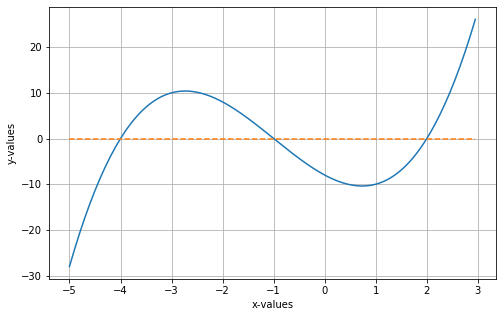

In [15]:
#Question 2

#define function
def function(x):
    return x**3+3*x**2-6*x-8

#define values to plot
xValues = np.arange(-5,3,0.05)
yValues = function(xValues)
yZero = np.zeros(len(xValues))

#plot the data
plt.rcParams['figure.figsize'] = 8, 5
plt.plot(xValues, yValues)
plt.plot(xValues, yZero, '--')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.grid(True)

#define function to find root
def root(x0,x1):
    dx = 100
    tolerance = 1e-10
    trials = []
    guess = []
    #Use if statments to put inputs in increasing order
    if x0 < x1:
        guess.append(x0)
        guess.append(x1)
    else:
        guess.append(x1)
        guess.append(x0)
    #Use while loop to iterate through
    while dx > tolerance: # Until the difference between the values are negligible. (Reached true value)
        mid = (guess[0] + guess[1])/2 #Find middle value between two points
        if function(mid) == 0: #Special case. If you guess well, the zero will be the middle value.
            trials.append(mid)
            break
        elif function(mid)<0: #Otherwise check the sign of the function at the middle value
            guess[0] = mid #Change variables depending on the signs
        else:
            guess[1] = mid
        dx = np.abs(guess[1] - guess[0]) #Update the difference between the values
        trials.append(mid) #Add all the mid points to a lsit
    return trials

root1 = root(-3.75, -5)
root2 = root(0, -2)
root3 = root(2.34567,1.76543)

print ("The root is", root1[-1],"which took", len(root1),"steps to find.")
print ("The root is", root2[-1],"which took", len(root2),"step to find.")
print ("The root is", root3[-1],"which took", len(root3),"steps to find.")

In [15]:
#Question 3

#Define function for the curve
def function(x):
    return x**3+3*x**2-6*x-8

#Define function for the trapezoid method
def trap(N):
    line = [-5, 3] #Set range
    bins = N 
    binSize = (line[1] - line[0])/bins #Determine the size of each bin
    area = (function(line[0]) + function(line[1]))/2 #Sum the end points
    i = 1 #Start counter at 1
    while i < N: #Use while loop to go through each bin 
        area += 2*function(line[0] + i*binSize) #Add the area
        i += 1 #move i up one step
    return ((binSize/2)*area)
    
area = trap(100)
print ("The area is", area)

The area is 1.1368683772161603e-15


In [ ]:
#When you use 100 bins, the area is close to zero and positive
#When you use 1000 bins, the area is close to zero, but negative. 
#So depending on thenuber of bins, the area is always going to zero, but can be negtive or positive